In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ROOT = '/media/thanhha/Data/datasets/English_feedback'
!ls $ROOT

current_pseudolabels  oofs		     submissions
fb3_pl_fold0.csv      pl_train.csv	     test.csv
fb3_pl_fold1.csv      previous_pseudolabels  train_5folds.csv
fb3_pl_fold2.csv      pseudolabels	     train.csv
fb3_pl_fold3.csv      raw		     train_feedback1.csv
fb3_pl_fold4.csv      sample_submission.csv  train_pl_df.csv


In [3]:
df_train = pd.read_csv(f'{ROOT}/train.csv')
df_train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [4]:
df_test = pd.read_csv(f'{ROOT}/test.csv')
df_test

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [5]:
df_sample = pd.read_csv(f'{ROOT}/sample_submission.csv')
df_sample

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


In [6]:
df_train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df_train['n_words'] = df_train.full_text.apply(lambda x: len(x.strip().split()))

In [8]:
TARGETS = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [9]:
df_train['label'] = list(np.stack([df_train[target].values for target in TARGETS], 1))

In [10]:
df_train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,n_words,label
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,"[3.5, 3.5, 3.0, 3.0, 4.0, 3.0]"
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,"[2.5, 2.5, 3.0, 2.0, 2.0, 2.5]"
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,"[3.0, 3.5, 3.0, 3.0, 3.0, 2.5]"
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,"[4.5, 4.5, 4.5, 4.5, 4.0, 5.0]"
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,"[2.5, 3.0, 3.0, 3.0, 2.5, 2.5]"
...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,"[2.5, 3.0, 3.0, 3.5, 2.5, 2.5]"
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,"[4.0, 4.0, 4.0, 4.0, 3.5, 3.0]"
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,"[2.5, 3.0, 3.0, 3.0, 3.5, 3.0]"
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,"[4.0, 4.5, 4.5, 4.0, 4.5, 4.5]"


<Axes: title={'center': 'Correlation between target variables'}>

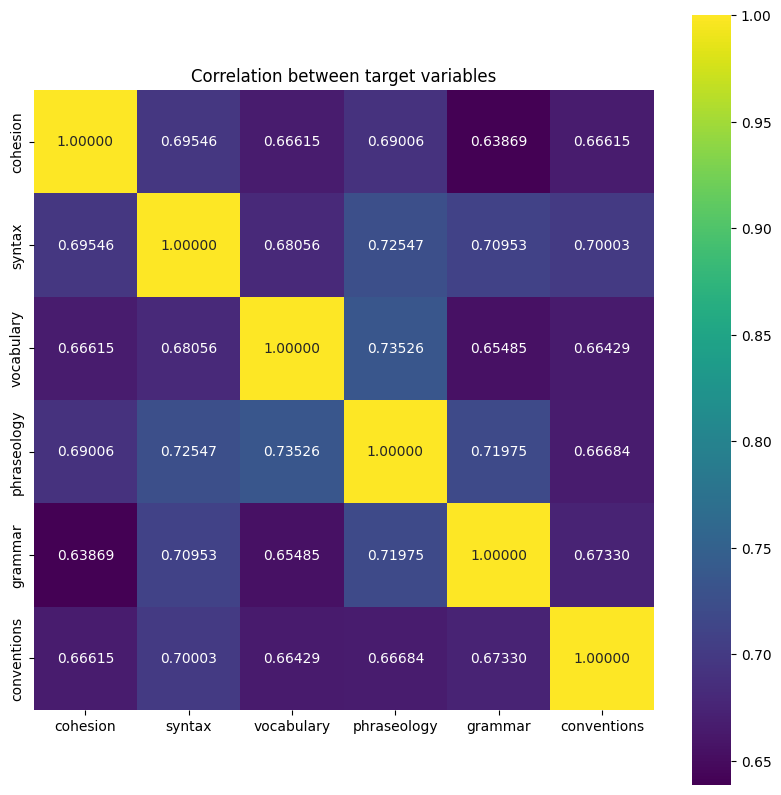

In [15]:
# correlation between target variables and plot it as a heatmap and put values on it
corr = df_train[TARGETS].corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation between target variables')
sns.heatmap(corr, annot=True, fmt=".5f", square=True, cmap='viridis')

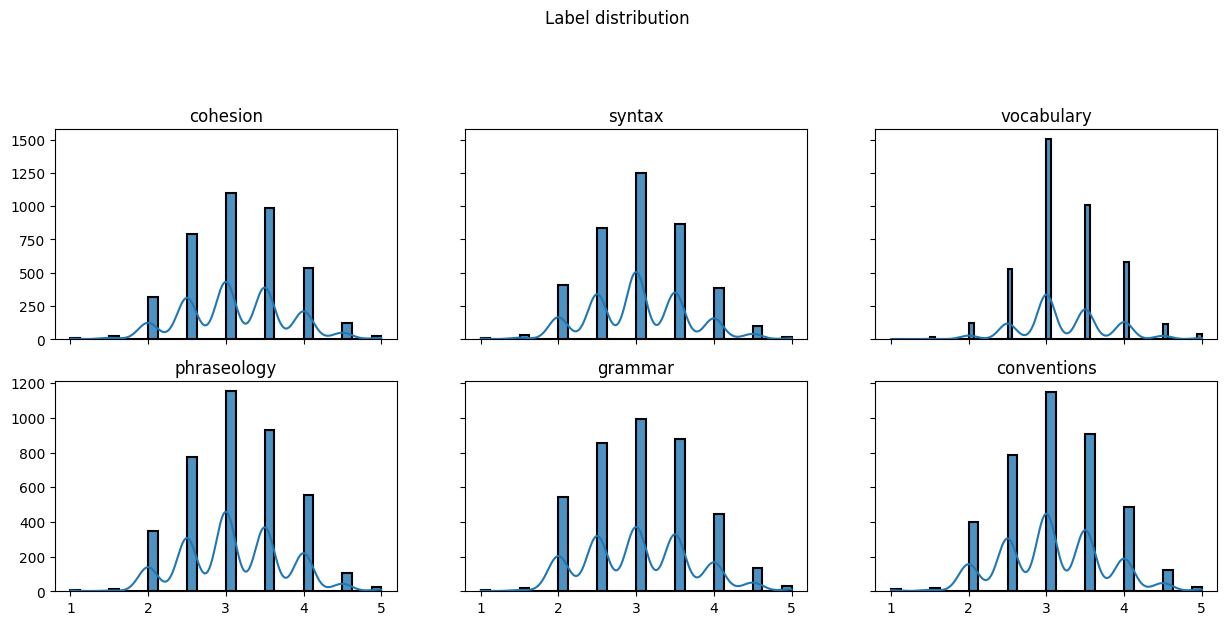

In [36]:
# distribution of target variables
fig, axes =  plt.subplots(2, len(TARGETS) // 2, sharex='col', sharey='row', figsize=(15, 6))
for i, label_col in enumerate(TARGETS):
    ax = axes.flat[i]
    sns.histplot(x=label_col, data=df_train, linewidth=1.5, alpha=0.8, ax=ax, zorder=2, kde=True)
    ax.set_title(label_col)
    ax.set(xlabel=None, ylabel=None)
    
fig.suptitle('Label distribution', y=1.08)
plt.show()